## Creating the control system
We first want to solve the differential equation for a damped pendulum, since this is the motion we want for our falling bicycle.

In [167]:
from scipy.integrate import odeint
import numpy as np

# the initial tilt angle and velocity
theta_0 = np.radians(5)
theta_dot_0 = .2 # in rad/s

y0 = [theta_0, theta_dot_0] # set our initial condition vector

t = np.linspace(0, 50, 101)

gamma = 0.1 # from gravity
zeta = 2 * theta_dot_0

def pend(y, t, gamma, zeta):
    theta, omega = y
    dydt = [omega, -zeta*omega - gamma*theta]
    return dydt 

sol = odeint(pend, y0, t, args=(gamma, zeta))

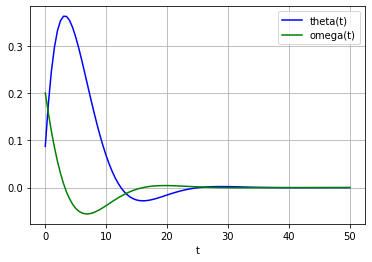

In [168]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### The flywheel response
Now that we have the desired theta and theta dot values over the time series, we want to see the flywheel response.

In [175]:
import numpy as np

g = 9.8

# bicycle frame
m = 15 # in kg
l = 1 # in m

# flywheel
m_flywheel = 0.5 # (mass of the flywheel)
r = 0.15 # radius of the flywheel (m)
I = (1/2) * m_flywheel*(r**2)

# def tilt():
#     """Calculates the bicycle's tilt angle and tilt velocity (theta and theta dot)"""
#     return [theta, theta_dot]

NORMALIZATION_FACTOR = 10000

def flywheel(theta, theta_dot):
    """Calculates the necessary flywheel acceleration for a given tilt angle theta (radians)"""
    phi_double_dot = ((m*l**2)/I)*( ((g/l + gamma)*theta) + zeta*theta_dot)
    return phi_double_dot

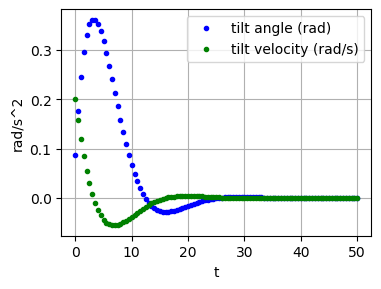

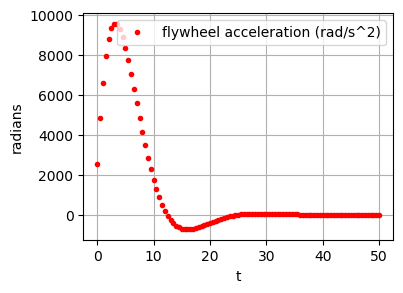

In [180]:
phi_double_dot = flywheel(sol[:, 0], sol[:,1])

figure(num=None, figsize=(4, 3), dpi=100, facecolor='w', edgecolor='k')

# plt.plot(t, phi_double_dot, 'r.', label='fllywheel acceleration (rad/s^2)')
plt.plot(t, sol[:,0], 'b.', label='tilt angle (rad)')
plt.plot(t, sol[:,1], 'g.', label='tilt velocity (rad/s)')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('rad/s^2')
plt.show()

figure(num=None, figsize=(4, 3), dpi=100, facecolor='w', edgecolor='k')

# plt.plot(t, phi_double_dot, 'r.', label='fllywheel acceleration (rad/s^2)')
plt.plot(t, phi_double_dot, 'r.', label='flywheel acceleration (rad/s^2)')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('radians')
plt.show()

## Adding delay
In a real-life control system, it would be difficult to engage the flywheel instantaneously in response to the detected acceleration. This delay would be particularly pronounced at the beginning, when the bicycle is falling. 

We could introduce a small delay, such that the flywheel function uses old tilt angle and tilt velocity values in calculating the needed acceleration to control the frame.

__NOTE: Left unfinished__

In [178]:
old_theta = 0
old_theta_dot = 0

phi_double_dot_delayed = []

for theta, theta_dot in zip(sol[:,0], sol[:,1]):
    # iterate over all the theta values
    phi_double_dot = flywheel(old_theta, old_theta_dot) / NORMALIZATION_FACTOR
    
    phi_double_dot_delayed.append(phi_double_dot)

    old_theta = theta
    old_theta_dot = theta_dot
    